In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


In [2]:
file_path = "/content/review-details.xlsx"
df = pd.read_excel(file_path)
df.head()


,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,5,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,4,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,5,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,2019-01-02,5,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [4]:
df = df[['review_text']]
df.dropna(inplace=True)
df.head()


,review_text
0,"As you get older, you know what you like and w..."
1,Three gigantic marmite jars that will last pro...
2,Excellent
3,A great flavour top - up for slow cooking.
4,Does what is says it does


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
def clean_text(text):
    text = str(text).lower()
    return text
df['clean_review'] = df['review_text'].apply(clean_text)


In [6]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['clean_review'].apply(get_sentiment)
df.head()


,review_text,clean_review,Sentiment
0,"As you get older, you know what you like and w...","as you get older, you know what you like and w...",Positive
1,Three gigantic marmite jars that will last pro...,three gigantic marmite jars that will last pro...,Positive
2,Excellent,excellent,Positive
3,A great flavour top - up for slow cooking.,a great flavour top - up for slow cooking.,Positive
4,Does what is says it does,does what is says it does,Neutral


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('review_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('clean_review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_review'].value_counts()
    for x_label, grp in _df_5.groupby('review_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review_text')
_ = plt.ylabel('clean_review')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_6.groupby('clean_review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('clean_review')
_ = plt.ylabel('Sentiment')

In [7]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts


,count
Sentiment,
Positive,2065
Neutral,236
Negative,200


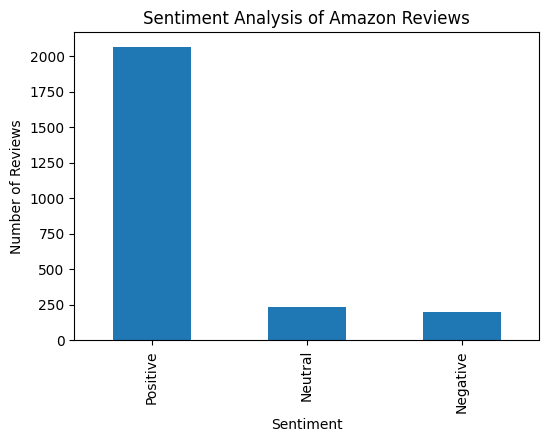

In [8]:
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Analysis of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()
